In [0]:
import numpy as np
import matplotlib.pyplot as plt

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261]


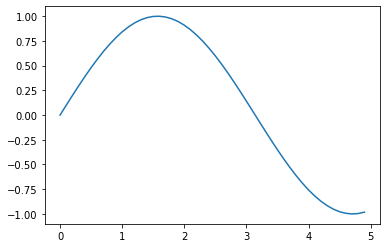

In [6]:
x = np.arange(0, 5, 0.1)
print(x)
y = np.sin(x)
print(y)
plt.plot(x,y)

# Что такое искусственный нейрон?

Икусственный нейрон - это всего лишь комбинация математических операций. Вектор чисел (входные данные) умножатеся на вектор коэффициентов (имено они как раз и "обучаются"); их произведения суммируются и поступают на вход функции активации, которая трансформируется в результат.

![alt text](https://drive.google.com/uc?id=1yFPLGhmGgBQ-pxEtWqw_3YemSwlFU-XT)

Обобщенная формула искусственного, получается, выглядит следующим образом:
$$y = f(\sum_{i=0}^n x_i*w_i + b)$$

В качестве функции активации может выстпать любая функция. До недавнего широкого распространения свёрточных нейронных сетей наиболее часто использовалась сигмоида. Сейчас - так называемая RELU-функция. Мы на данном вебинаре реализуем в первую очередь сигмоиду (она показана на картинке). Но код легко будет заменить на любой необходимый.

![Сигмоида](https://python-scripts.com/wp-content/uploads/2019/10/neural-networks-10.jpg)

Формула функции сигмоиды: $$y = \frac{1}{(1+e^{-x})}$$

# Создаём свой нейрон

In [0]:
# определеним функцию (в языке программирования) для вычислени значения функции (математика) с использованием формулы сигмоиды

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [23]:
sigmoid(3)

0.9525741268224334

In [18]:
a = "string"
print(type(a))

<class 'str'>


In [0]:
# создаём класс для нейрона

class Neuron:
  weigths = []
  bias = 0

  def __init__(self, our_weights, our_bias):
    self.weigths = our_weights
    self.bias = our_bias

  def feedforward_neuron(self, inputs):
    #np array
    result = np.dot(self.weigths, inputs) + self.bias
    return sigmoid(result)


In [35]:
# посмотрим простой пример w1 = 0, w2 = 1, b = 1
'''
входные данные 1, 1
1*0 + 1*1 + 1 = 2
сигмоид(2) = 0.88
'''

weigths1 = np.array([0,1])
bias1 = 1

n = Neuron(weigths1, bias1)

x = np.array([1, 1])
print(n.feedforward_neuron(x))

'''
1*1 + 2*1 + 0 = 3
'''

weigths2 = np.array([1,2])
bias2 = 0

n1 = Neuron(weigths2, bias2)
print(n1.feedforward_neuron(x))


1.0
1.0


# Что такой нейронная сеть?

Нейронная сеть - группа связанных между собой нейронов. Классические сети - полносязные. Бывают и другие. Есть три типа слоёв: 

*   Входной - принимает на вход сигналы
*   Скрытые - "рабочие" слои, преобразуют входные данные в выходные
*   Выходной - позволяет считать результат

Количество нейроннов в каждом слое зависит от желания "автора" той или иной сети. 

Мы будем делать очень простую сетку - она на вход будет принимать две сигнала и сразу передавать результат обработки на выход.

![alt text](https://drive.google.com/uc?id=1ooVWuapuohvaAvvOa_MGfKRdDy4NA8Ta)



# Создаём свою нейросеть

In [0]:
class NeuralNetwork:
  n1 = None
  n2 = None
  o = None

  def __init__(self):
    weights = np.array([0,1])
    bias = 0

    self.n1 = Neuron(weights, bias)
    self.n2 = Neuron(weights, bias)
    self.o = Neuron(weights, bias)
  
  def feedforward_net(self, x):
    print('Передали')
    out_n1 = self.n1.feedforward_neuron(x)
    print(out_n1)
    out_n2 = self.n2.feedforward_neuron(x)
    print(out_n2)

    out_o = self.o.feedforward_neuron(np.array([out_n1, out_n2]))

    return out_o

In [50]:
net = NeuralNetwork()
x = np.array([2,3])
print('Передадим данные')
print(net.feedforward_net(x))


'''
n1 = 0*2 + 3*1 + 0
n2 - аналогично

o = 0*0.95 + 1*0.95 + 0 = 0.95
'''

Передадим данные
Передали
Теперь будет считаться нейрон
0.9525741268224334
Теперь будет считаться нейрон
0.9525741268224334
Теперь будет считаться нейрон
0.7216325609518421


'\nn1 = 0*2 + 3*1 + 0\nn2 - аналогично\n\no = 0*0.95 + 1*0.95 + 0 = 0.95\n'

# Создать мало - нужно тренировать. Считаем точность

Создать нейронную сеть не досаточно. Необходимо подобрать такие значения коэффициентов и смещения, которые ползволят добиться наиболее точных результатов. 

Для начала разберём, как посчитать точность результатов. 

Предположим, что есть текущие результаты, предсказанные нейронной сетью $y_{pred}$ и истинные значения $y_{true}$. Известный способ подсчитать ошибку - сумма квадратов отклонений. 

$$MSE = (\sum_{i=0}^n (y_{true}-y_{pred})^{2}) / n $$

Для понимания можно посомтреть график.

![alt text](https://drive.google.com/uc?id=1y6Rbh9Pn7q8J78dy0wnjN5uaCeDfWs0q)

Основная задача при обучении - минимизировать эту сумму.


In [0]:
def mse_loss(y_true, y_pred):
    # y_true и y_pred являются массивами numpy с одинаковой длиной
    return ((y_true - y_pred) ** 2).mean()

In [0]:
def mse_loss_2(y_true, y_pred):
  sum = 0
  for i in range(0, len(y_true)):
    sum = sum + (y_true[i]-y_pred[i])**2
  return sum/len(y_true)

In [64]:
# для примера

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])
 
print(mse_loss(y_true, y_pred))  # 0.5
print(mse_loss_2(y_true, y_pred))

0.5
0.5


# Создать мало - нужно тренировать. Как тренировать?

Схема обучения - простая. Нам необходимы взять исходные данные с известным результатом. Подаём на вход исходные данные, смотрим результат, меняем значения коэффициентов нейроннов, и так далее. 

### Здесь далее будет "сложная" математика. К сожалению без неё ни как. 

Итак, предположим, что вся наша нейронная сеть - это функция от коэффициентов и сммещения (3 нейрона)

$ L(w_{всенейроны},b_{всенейроны}) = L(w_1, w_2, w_3, w_4, w_5, w_6, b_1, b_2, b_3)$

Производные считаем через частные произодные для любого из коэффициентов, например для $ w_1 $

$ \partial L/\partial w_1 = \partial L/\partial y_{pred} * \partial y_{pred}/\partial w_1 $

$ \partial L/\partial y_{pred} = -2(y_{true} - y_{pred})$

Значение $y_{true}$ мы в каждом конкретном случае знаем.

$ \partial y_{pred}/\partial w_1 = \partial y_{pred}/\partial n_{1} * \partial n_{1}/\partial w_1 $

$ \partial y_{pred}/\partial n_{1} = w_5 f'(w_5*n_1 + w_6*n_2+b_3) $

$ \partial n_{1}/\partial w_1 = x_1 f'(w_1*x_1 + w_2*x_2+b_1) $

Осталось только для удобства рассчитать производную от известной нам функции - сигмоиды. Поверьте мне на слово)

$ f'(x) = (1-f(x))*f(x)$

Сейчас мы посчитали ошибку **методом обратного распространения ошибки**.

Разбавим картикной для совсем более явного пояснения:

![alt text](https://ok-t.ru/studopedia/baza7/1364490912182.files/image115.gif)

Осталось только определить, как считаем изменненные значения коэффициентов и смещений:

$ w_1 = w_1 - k * \partial L /\partial w_1 $

$ k $ - задаётся человеком и определяет скорость **градиенного спуска**. Его смысл в том, что изменяем коэффициент в сторону убывания производной.


In [0]:
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

def deriv_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)

class NeuralNetwork:
  w1 = 0
  w2 = 0
  w3 = 0
  w4 = 0
  w5 = 0
  w6 = 0
  b1 = 0
  b2 = 0
  b3 = 0

  n1 = None
  n2 = None
  o = None
  
  def __init__(self):
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    n1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    n2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o = sigmoid(self.w5 * n1 + self.w6 * n2 + self.b3)
    return o

  def train(self, data, all_y_trues, learn_rate, epochs):

    loss_row = []

    for _ in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # прямой проход
        sum_n1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        n1 = sigmoid(sum_n1)

        sum_n2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        n2 = sigmoid(sum_n2)

        sum_o = self.w5 * n1 + self.w6 * n2 + self.b3
        o = sigmoid(sum_o)
        y_pred = o

        # обратный проход

        d_L_d_ypred = -2 * (y_true-y_pred)

        d_ypred_d_w5 = n1 * deriv_sigmoid(sum_o)
        d_ypred_d_w6 = n2 * deriv_sigmoid(sum_o)
        d_ypred_d_b3 = deriv_sigmoid(sum_o)

        d_ypred_d_n1 = self.w5 * deriv_sigmoid(sum_o)
        d_ypred_d_n2 = self.w6 * deriv_sigmoid(sum_o)

        # Нейрон n1
        d_n1_d_w1 = x[0] * deriv_sigmoid(sum_n1)
        d_n1_d_w2 = x[1] * deriv_sigmoid(sum_n1)
        d_n1_d_b1 = deriv_sigmoid(sum_n1)

        # Нейрон n2
        d_n2_d_w3 = x[0] * deriv_sigmoid(sum_n2)
        d_n2_d_w4 = x[1] * deriv_sigmoid(sum_n2)
        d_n2_d_b2 = deriv_sigmoid(sum_n2)

        # изменение значений

          # Нейрон n1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_n1 * d_n1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_n1 * d_n1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_n1 * d_n1_d_b1

        # Нейрон n2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_n2 * d_n2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_n2 * d_n2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_n2 * d_n2_d_b2

        # Нейрон o
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
      
      y_preds = np.apply_along_axis(self.feedforward, 1, data)
      loss = mse_loss(all_y_trues, y_preds)
      loss_row.append(loss)
    
    return loss_row


# Тестируем нейронную сеть

Определяем пол по росту и весу

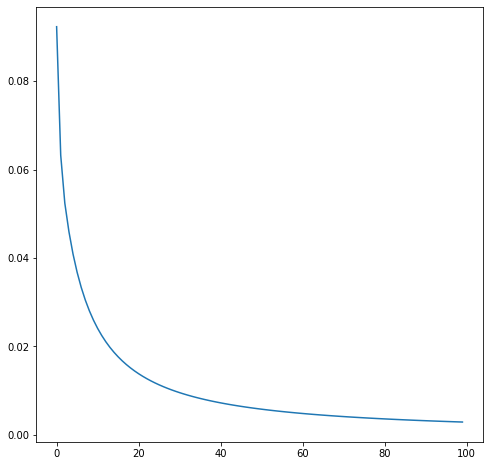

In [105]:
data = np.array([
    [57, 165],     # Алиса
    [78, 183],     # Боб
    [92, 190],     # Иван
    [52, 172],     # Марья
])

mean_weight = (92+78+57+52)/4

mean_height = (165+183+190+172)/4


data = np.array([
    [57-int(mean_weight), 165-int(mean_height)],     # Алиса
    [78-int(mean_weight), 183-int(mean_height)],     # Боб
    [92-int(mean_weight), 190-int(mean_height)],     # Иван
    [52-int(mean_weight), 172-int(mean_height)],     # Марья
])


#print(data)
 
all_y_trues = np.array([
    1, # Алиса
    0, # Боб
    0, # Иван
    1, # Марья
])
 
# Тренируем нашу нейронную сеть!
network = NeuralNetwork()
learn_rate = 0.5 #k
epochs = 100
loss = network.train(data, all_y_trues, learn_rate, epochs)

plt.figure(figsize = (8, 8))
plt.plot(loss)
plt.show()

In [106]:
w_name = np.array([55, 160]) 

w_name[0] = w_name[0] - mean_weight
w_name[1] = w_name[1] - mean_height

m_name = np.array([72, 190])  

m_name[0] = m_name[0] - mean_weight
m_name[1] = m_name[1] - mean_height

print(f"Женщина: {network.feedforward(w_name)}") 
print(f"Мужчина: {network.feedforward(m_name)}")  

Женщина: 0.9460139378469328
Мужчина: 0.4048084073726822
